### Business Objective:
To extract E-books of your choice and extract summary ,categorize summary as positive,negative or neutral.

## Libraries

In [1]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
lm= WordNetLemmatizer()

from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import re
import string
nltk.download("stopwords")


from nltk.probability import FreqDist
from matplotlib.pyplot import imshow
from wordcloud import WordCloud, STOPWORDS

from nltk.tag import pos_tag

import string 

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/a/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data

In [2]:
from tika import parser
raw = parser.from_file('Wings of fire.pdf')
book_summary = raw['content']

2022-05-07 19:35:56,635 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2022-05-07 19:36:20,751 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2022-05-07 19:36:22,112 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


##### Sentence tokenize

In [3]:
sentence=nltk.sent_tokenize(book_summary)
sentence

['\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nWings of fire by Abdul Kalam\n\n\n\n\n\n\n\n\nWINGS OF FIRE\nAn Autobiography\n\nAVUL PAKIR JAINULABDEEN ABDUL KALAM has\ncome to personally represent to many of his countrymen the\nbest aspects of Indian life.',
 'Born in 1931, the son of a little\neducated boatowner in Rameswaram, Tamilnadu, he had\nan unparalleled career as a defence scientist, culminating\nin the highest civilian award of India, the Bharat Ratna.',
 'As chief of the country’s defence research and\ndevelopment programme, Kalam demonstrated the great\npotential for dynamism and innovation that existed in\nseemingly moribund research establishments.',
 'This is the\nstory of Kalam’s rise from obscurity and his personal and\nprofessional struggles, as well as the story of Agni, Prithvi,\nAkash, Trishul a nd Nag - missiles that have become\nhousehold names in India and that have raised the nation to\nthe level of a missile power of international

##### Words tokenize

In [5]:
words=nltk.word_tokenize(book_summary)
print(words)

['Wings', 'of', 'fire', 'by', 'Abdul', 'Kalam', 'WINGS', 'OF', 'FIRE', 'An', 'Autobiography', 'AVUL', 'PAKIR', 'JAINULABDEEN', 'ABDUL', 'KALAM', 'has', 'come', 'to', 'personally', 'represent', 'to', 'many', 'of', 'his', 'countrymen', 'the', 'best', 'aspects', 'of', 'Indian', 'life', '.', 'Born', 'in', '1931', ',', 'the', 'son', 'of', 'a', 'little', 'educated', 'boatowner', 'in', 'Rameswaram', ',', 'Tamilnadu', ',', 'he', 'had', 'an', 'unparalleled', 'career', 'as', 'a', 'defence', 'scientist', ',', 'culminating', 'in', 'the', 'highest', 'civilian', 'award', 'of', 'India', ',', 'the', 'Bharat', 'Ratna', '.', 'As', 'chief', 'of', 'the', 'country', '’', 's', 'defence', 'research', 'and', 'development', 'programme', ',', 'Kalam', 'demonstrated', 'the', 'great', 'potential', 'for', 'dynamism', 'and', 'innovation', 'that', 'existed', 'in', 'seemingly', 'moribund', 'research', 'establishments', '.', 'This', 'is', 'the', 'story', 'of', 'Kalam', '’', 's', 'rise', 'from', 'obscurity', 'and', 'hi

##### cleaned sentences and tags

In [6]:
list1=[]

for i in range(0, len(sentence)):
    review=re.sub('[^a-zA-Z]',' ',sentence[i]).lower().split()
    review=[lm.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    list1.append(review)


In [7]:
list1

['wing fire abdul kalam wing fire autobiography avul pakir jainulabdeen abdul kalam come personally represent many countryman best aspect indian life',
 'born son little educated boatowner rameswaram tamilnadu unparalleled career defence scientist culminating highest civilian award india bharat ratna',
 'chief country defence research development programme kalam demonstrated great potential dynamism innovation existed seemingly moribund research establishment',
 'story kalam rise obscurity personal professional struggle well story agni prithvi akash trishul nd nag missile become household name india raised nation level missile power international recokoning',
 'time helped create india awesome weaponry kalam maintained ascetic rigour personal life working hour day practicing veena',
 'characteristic modesty kalam ascribes greatness achievement influence teacher mentor',
 'describes struggle boyhood youth bringing alive everyday life small town south india inspirational role educator',


In [24]:
# Tags

for i in range(0, len(list1)):
    print(pos_tag(nltk.word_tokenize(str(list1[i]))))
    print("\n")

[('wing', 'VBG'), ('fire', 'NN'), ('abdul', 'NN'), ('kalam', 'NN'), ('wing', 'VBG'), ('fire', 'NN'), ('autobiography', 'NN'), ('avul', 'NN'), ('pakir', 'NN'), ('jainulabdeen', 'NN'), ('abdul', 'NN'), ('kalam', 'VBD'), ('come', 'VBN'), ('personally', 'RB'), ('represent', 'VBP'), ('many', 'JJ'), ('countryman', 'NN'), ('best', 'JJS'), ('aspect', 'NN'), ('indian', 'JJ'), ('life', 'NN')]


[('born', 'JJ'), ('son', 'NN'), ('little', 'RB'), ('educated', 'VBD'), ('boatowner', 'NN'), ('rameswaram', 'NN'), ('tamilnadu', 'NN'), ('unparalleled', 'VBD'), ('career', 'NN'), ('defence', 'NN'), ('scientist', 'NN'), ('culminating', 'VBG'), ('highest', 'JJS'), ('civilian', 'JJ'), ('award', 'NN'), ('india', 'NN'), ('bharat', 'NN'), ('ratna', 'NN')]


[('chief', 'JJ'), ('country', 'NN'), ('defence', 'NN'), ('research', 'NN'), ('development', 'NN'), ('programme', 'NN'), ('kalam', 'NN'), ('demonstrated', 'VBD'), ('great', 'JJ'), ('potential', 'JJ'), ('dynamism', 'NN'), ('innovation', 'NN'), ('existed', 'VBD'

[('high', 'JJ'), ('priest', 'JJS'), ('rameswaram', 'NN'), ('temple', 'NN'), ('pakshi', 'NN'), ('lakshmana', 'VBD'), ('sastry', 'NN'), ('close', 'RB'), ('friend', 'VBP'), ('father', 'NN')]


[('one', 'CD'), ('vivid', 'JJ'), ('memory', 'NN'), ('early', 'JJ'), ('childhood', 'NN'), ('two', 'CD'), ('men', 'NNS'), ('traditional', 'JJ'), ('attire', 'NN'), ('discussing', 'VBG'), ('spiritual', 'JJ'), ('matter', 'NN')]


[('old', 'JJ'), ('enough', 'RB'), ('ask', 'JJ'), ('question', 'NN'), ('asked', 'VBD'), ('father', 'JJR'), ('relevance', 'NN'), ('prayer', 'NN')]


[('father', 'NN'), ('told', 'VBD'), ('nothing', 'NN'), ('mysterious', 'JJ'), ('prayer', 'NN')]


[('rather', 'RB'), ('prayer', 'NN'), ('made', 'VBD'), ('possible', 'JJ'), ('communion', 'NN'), ('spirit', 'NN'), ('people', 'NNS')]


[('pray', 'NN'), ('said', 'VBD'), ('transcend', 'JJ'), ('body', 'NN'), ('become', 'VB'), ('part', 'NN'), ('cosmos', 'NNS'), ('know', 'VBP'), ('division', 'NN'), ('wealth', 'NN'), ('age', 'NN'), ('caste', 'NN

[('iyadurai', 'NN'), ('solomon', 'NN'), ('used', 'VBN'), ('say', 'VBP'), ('succeed', 'VB'), ('life', 'NN'), ('achieve', 'JJ'), ('result', 'NN'), ('must', 'MD'), ('understand', 'VB'), ('master', 'NN'), ('three', 'CD'), ('mighty', 'NN'), ('force', 'NN'), ('desire', 'NN'), ('belief', 'NN'), ('expectation', 'NN'), ('iyadurai', 'NN'), ('solomon', 'NN'), ('later', 'RB'), ('became', 'VBD'), ('reverend', 'JJ'), ('taught', 'NN'), ('anything', 'NN'), ('wanted', 'VBD'), ('could', 'MD'), ('happen', 'VB'), ('desire', 'VB'), ('intensely', 'RB'), ('absolutely', 'RB'), ('certain', 'JJ'), ('would', 'MD'), ('happen', 'VB')]


[('take', 'VB'), ('example', 'NN'), ('life', 'NN'), ('fascinated', 'VBD'), ('mystery', 'JJ'), ('sky', 'NN'), ('flight', 'NN'), ('bird', 'NN'), ('early', 'JJ'), ('childhood', 'NN')]


[('used', 'VBN'), ('watch', 'NN'), ('crane', 'NN'), ('seagull', 'NN'), ('soar', 'VB'), ('flight', 'NN'), ('longed', 'VBN'), ('fly', 'NN')]


[('simple', 'JJ'), ('provincial', 'JJ'), ('boy', 'NN'), ('th

[('would', 'MD'), ('like', 'VB'), ('tell', 'VB'), ('novitiate', 'JJ'), ('engineering', 'NN'), ('student', 'NN'), ('choose', 'JJ'), ('specialization', 'NN'), ('essential', 'JJ'), ('point', 'NN'), ('consider', 'VBP'), ('whether', 'IN'), ('choice', 'NN'), ('articulates', 'NNS'), ('inner', 'VBP'), ('feeling', 'VBG'), ('aspiration', 'NN')]


[('prof', 'NN'), ('kav', 'NN'), ('pandalai', 'NN'), ('taught', 'VBD'), ('aero', 'JJ'), ('structure', 'NN'), ('design', 'NN'), ('analysis', 'NN')]


[('cheerful', 'JJ'), ('friendly', 'RB'), ('enthusiastic', 'JJ'), ('teacher', 'NN'), ('brought', 'VBD'), ('fresh', 'JJ'), ('approach', 'NN'), ('every', 'DT'), ('year', 'NN'), ('teaching', 'VBG'), ('course', 'NN')]


[('professor', 'NN'), ('pandalai', 'NN'), ('opened', 'VBD'), ('secret', 'JJ'), ('structural', 'JJ'), ('engineering', 'NN'), ('u', 'NN')]


[('even', 'RB'), ('today', 'NN'), ('believe', 'VBP'), ('everyone', 'NN'), ('taught', 'NN'), ('prof', 'NN'), ('pandalai', 'NN'), ('would', 'MD'), ('agree', 'VB'

[('seemed', 'VBD'), ('feeling', 'VBG'), ('loneliness', 'NN'), ('pervaded', 'VBD'), ('city', 'NN')]


[('people', 'NNS'), ('street', 'VBP'), ('come', 'JJ'), ('village', 'NN'), ('search', 'NN'), ('job', 'NN'), ('factory', 'NN'), ('leaving', 'VBG'), ('behind', 'IN'), ('smell', 'NN'), ('soil', 'NN'), ('protection', 'NN'), ('family', 'NN')]


[('return', 'NN'), ('delhi', 'NN'), ('informed', 'VBD'), ('design', 'JJ'), ('dart', 'NN'), ('target', 'NN'), ('taken', 'VBN'), ('dtd', 'JJ'), ('p', 'NN'), ('air', 'NN'), ('included', 'VBD'), ('design', 'NN'), ('team', 'NN')]


[('completed', 'VBN'), ('task', 'NN'), ('team', 'NN'), ('member', 'NN')]


[('undertook', 'JJ'), ('preliminary', 'JJ'), ('design', 'NN'), ('study', 'NN'), ('human', 'JJ'), ('centrifuge', 'NN')]


[('later', 'RB'), ('carried', 'VBN'), ('design', 'NN'), ('development', 'NN'), ('vertical', 'JJ'), ('takeoff', 'NN'), ('landing', 'VBG'), ('platform', 'NN')]


[('also', 'RB'), ('associated', 'VBN'), ('development', 'NN'), ('construction

[('collector', 'NN'), ('trivandrum', 'NN'), ('k', 'NN'), ('madhavan', 'NNP'), ('nair', 'NN'), ('executed', 'VBD'), ('task', 'NN'), ('tactful', 'JJ'), ('peaceful', 'JJ'), ('expeditious', 'JJ'), ('manner', 'NN'), ('blessing', 'VBG'), ('cooperation', 'NN'), ('right', 'RB'), ('rev', 'NN')]


[('dr', 'NN'), ('dereira', 'NN'), ('bishop', 'NN'), ('trivandrum', 'NN')]


[('soon', 'RB'), ('rd', 'JJ'), ('john', 'NN'), ('executive', 'NN'), ('engineer', 'JJ'), ('central', 'JJ'), ('public', 'JJ'), ('work', 'NN'), ('department', 'NN'), ('cpwd', 'NN'), ('transformed', 'VBD'), ('entire', 'JJ'), ('area', 'NN')]


[('st', 'NN'), ('mary', 'JJ'), ('magdalene', 'NN'), ('church', 'NN'), ('housed', 'VBD'), ('first', 'JJ'), ('office', 'NN'), ('thumba', 'NN'), ('space', 'NN'), ('centre', 'NN')]


[('prayer', 'NN'), ('room', 'NN'), ('first', 'RB'), ('laboratory', 'JJ'), ('bishop', 'NN'), ('room', 'NN'), ('design', 'NN'), ('drawing', 'VBG'), ('office', 'NN')]


[('day', 'NN'), ('church', 'NN'), ('maintained', 'V

[('intention', 'NN'), ('using', 'VBG'), ('merely', 'RB'), ('mean', 'JJ'), ('display', 'NN'), ('might', 'MD')]


[('dreamer', 'NN'), ('uring', 'VBG'), ('frequent', 'JJ'), ('visit', 'NN'), ('thumba', 'NN'), ('prof', 'NN'), ('sarabhai', 'NN'), ('would', 'MD'), ('openly', 'RB'), ('review', 'VB'), ('progress', 'NN'), ('work', 'NN'), ('entire', 'JJ'), ('team', 'NN')]


[('never', 'RB'), ('gave', 'VBD'), ('direction', 'NN')]


[('rather', 'RB'), ('free', 'JJ'), ('exchange', 'NN'), ('view', 'NN'), ('led', 'VBD'), ('u', 'JJ'), ('forward', 'RB'), ('new', 'JJ'), ('terrain', 'NN'), ('often', 'RB'), ('revealed', 'VBD'), ('unforeseen', 'JJ'), ('solution', 'NN')]


[('perhaps', 'RB'), ('aware', 'JJ'), ('though', 'IN'), ('particular', 'JJ'), ('goal', 'NN'), ('might', 'MD'), ('clear', 'VB'), ('could', 'MD'), ('give', 'VB'), ('adequate', 'JJ'), ('direction', 'NN'), ('accomplishment', 'NN'), ('team', 'NN'), ('member', 'NN'), ('might', 'MD'), ('resisted', 'VB'), ('working', 'VBG'), ('towards', 'NNS'), ('g

[('rato', 'NN'), ('motor', 'NN'), ('mounted', 'VBD'), ('aircraft', 'NN'), ('provide', 'VBP'), ('additional', 'JJ'), ('thrust', 'NN'), ('required', 'VBN'), ('take', 'VB'), ('run', 'NN'), ('certain', 'JJ'), ('adverse', 'JJ'), ('operating', 'VBG'), ('condition', 'NN'), ('like', 'IN'), ('partially', 'RB'), ('bombed', 'VBN'), ('runway', 'RB'), ('high', 'JJ'), ('altitude', 'NN'), ('airfield', 'VBD'), ('prescribed', 'JJ'), ('load', 'NN'), ('high', 'JJ'), ('ambient', 'NN'), ('temperature', 'NN')]


[('air', 'NN'), ('force', 'NN'), ('dire', 'NN'), ('need', 'VBP'), ('large', 'JJ'), ('number', 'NN'), ('rato', 'NN'), ('motor', 'NN'), ('hf', 'NN'), ('aircraft', 'NN')]


[('russian', 'JJ'), ('rato', 'NN'), ('motor', 'NN'), ('shown', 'VBN'), ('u', 'JJ'), ('tilpat', 'NN'), ('range', 'NN'), ('capable', 'JJ'), ('generating', 'VBG'), ('kg', 'NN'), ('thrust', 'NN'), ('total', 'JJ'), ('impulse', 'JJ'), ('kgseconds', 'NNS')]


[('weighed', 'VBN'), ('kg', 'NN'), ('double', 'JJ'), ('base', 'NN'), ('propellant

[('modified', 'VBN'), ('existing', 'VBG'), ('slv', 'NN'), ('iv', 'NN'), ('stage', 'NN'), ('design', 'NN'), ('suit', 'NN'), ('diamont', 'NN'), ('airframe', 'NN')]


[('reconfigured', 'VBN'), ('upgraded', 'JJ'), ('kg', 'NN'), ('mm', 'NN'), ('diameter', 'NN'), ('stage', 'NN'), ('kg', 'VBD'), ('mm', 'JJ'), ('diameter', 'NN'), ('stage', 'NN')]


[('two', 'CD'), ('year', 'NN'), ('effort', 'NN'), ('deliver', 'NN'), ('cnes', 'NNS'), ('french', 'JJ'), ('suddenly', 'RB'), ('cancelled', 'VBD'), ('diamont', 'JJ'), ('bc', 'NN'), ('programme', 'NN')]


[('told', 'VBN'), ('u', 'JJ'), ('need', 'NN'), ('stage', 'NN'), ('iv', 'NN'), ('anymore', 'RB')]


[('great', 'JJ'), ('shock', 'NN'), ('making', 'VBG'), ('live', 'JJ'), ('earlier', 'RBR'), ('disappointment', 'JJ'), ('dehra', 'NN'), ('dun', 'NN'), ('failed', 'VBD'), ('get', 'VB'), ('air', 'NN'), ('force', 'NN'), ('bangalore', 'NN'), ('nandi', 'NN'), ('project', 'NN'), ('aborted', 'VBD'), ('ade', 'NN')]


[('invested', 'VBN'), ('great', 'JJ'), ('hope', 

[('boosted', 'VBN'), ('morale', 'NN'), ('helped', 'VBD'), ('great', 'JJ'), ('deal', 'NN'), ('accept', 'VB'), ('setback', 'NN'), ('revitalize', 'JJ'), ('period', 'NN'), ('intense', 'JJ'), ('work', 'NN')]


[('member', 'NN'), ('slv', 'NN'), ('project', 'NN'), ('team', 'NN'), ('specialist', 'NN'), ('field', 'NN')]


[('natural', 'JJ'), ('therefore', 'RB'), ('one', 'CD'), ('valued', 'VBN'), ('independence', 'NN')]


[('manage', 'NN'), ('performance', 'NN'), ('specialist', 'NN'), ('team', 'NN'), ('leader', 'NN'), ('adopt', 'VB'), ('delicate', 'JJ'), ('balance', 'NN'), ('hand', 'NN'), ('hand', 'NN'), ('approach', 'NN')]


[('hand', 'NN'), ('approach', 'NN'), ('take', 'VB'), ('active', 'JJ'), ('interest', 'NN'), ('regular', 'JJ'), ('basis', 'NN'), ('member', 'NN'), ('work', 'NN')]


[('hand', 'NN'), ('approach', 'NN'), ('trust', 'NN'), ('team', 'NN'), ('member', 'NN'), ('recognizes', 'VBZ'), ('need', 'VBP'), ('autonomy', 'JJ'), ('carry', 'JJ'), ('role', 'NN'), ('see', 'VBP'), ('fit', 'JJ')]



[('knowledge', 'NN'), ('tangible', 'JJ'), ('asset', 'NN'), ('quite', 'RB'), ('often', 'RB'), ('important', 'JJ'), ('tool', 'NN'), ('work', 'NN')]


[('date', 'NN'), ('knowledge', 'NN'), ('posse', 'NN'), ('freer', 'NN')]


[('knowledge', 'NN'), ('can', 'MD'), ('not', 'RB'), ('taken', 'VBN'), ('away', 'RP'), ('anyone', 'NN'), ('except', 'IN'), ('obsolescence', 'NN')]


[('leader', 'NN'), ('free', 'JJ'), ('lead', 'NN'), ('team', 'NN'), ('keep', 'VB'), ('abreast', 'IN'), ('happening', 'VBG'), ('around', 'IN'), ('real', 'JJ'), ('time', 'NN')]


[('lead', 'JJ'), ('way', 'NN'), ('engage', 'NN'), ('continuing', 'VBG'), ('education', 'NN')]


[('many', 'JJ'), ('country', 'NN'), ('normal', 'JJ'), ('professional', 'JJ'), ('go', 'VB'), ('college', 'NN'), ('several', 'JJ'), ('night', 'NN'), ('every', 'DT'), ('week', 'NN')]


[('successful', 'JJ'), ('team', 'NN'), ('leader', 'NN'), ('one', 'CD'), ('stay', 'NN'), ('back', 'RB'), ('din', 'JJ'), ('clutter', 'NN'), ('working', 'VBG'), ('day', 'NN'), ('e

[('sitting', 'VBG'), ('alone', 'RB'), ('night', 'NN'), ('burial', 'JJ'), ('remembered', 'VBD'), ('poem', 'JJ'), ('written', 'VBN'), ('death', 'NN'), ('yeats', 'NNS'), ('friend', 'VBP'), ('auden', 'JJ'), ('felt', 'NN'), ('written', 'VBN'), ('father', 'RB'), ('earth', 'JJ'), ('receive', 'VBP'), ('honoured', 'VBN'), ('guest', 'JJS'), ('william', 'NN'), ('yeats', 'NNS'), ('laid', 'VBD'), ('rest', 'NN')]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[('prison', 'NN'), ('daysteach', 'NN'), ('free', 'JJ'), ('man', 'NN'), ('praise', 'NN')]


[('worldly', 'RB'), ('term', 'NN'), ('death', 'NN'), ('another', 'DT'), ('old', 'JJ'), ('man', 'NN')]


[('public', 'JJ'), ('mourning', 'VBG'), ('organized', 'VBN'), ('flag', 'NN'), ('lowered', 'VBD'), ('half', 'NN'), ('mast', 'NN'), ('newspaper', 'NN'), ('carried', 'VBD'), ('obituary', 'JJ')]


[('politician', 'JJ'), ('scholar', 'NN'), ('businessman', 'NN')]


[('plain', 'NN'), ('transparent', 'NN'), ('man', '

[('isolated', 'JJ'), ('common', 'JJ'), ('denominator', 'NN'), ('set', 'VBN'), ('stage', 'NN'), ('flow', 'NN')]


[('experienced', 'JJ'), ('state', 'NN'), ('many', 'JJ'), ('time', 'NN'), ('almost', 'RB'), ('every', 'DT'), ('day', 'NN'), ('slv', 'VBZ'), ('mission', 'NN')]


[('day', 'NN'), ('laboratory', 'NN'), ('looked', 'VBD'), ('find', 'JJ'), ('laboratory', 'NN'), ('empty', 'NNS'), ('realised', 'VBD'), ('way', 'NN'), ('past', 'IN'), ('quitting', 'NN'), ('time', 'NN')]


[('day', 'NN'), ('team', 'NN'), ('member', 'NN'), ('caught', 'VBD'), ('work', 'NN'), ('lunch', 'NN'), ('hour', 'NN'), ('slipped', 'VBD'), ('without', 'IN'), ('even', 'RB'), ('conscious', 'JJ'), ('hungry', 'NN')]


[('analysing', 'VBG'), ('occasion', 'NN'), ('retrospect', 'NN'), ('find', 'VBP'), ('similar', 'JJ'), ('sense', 'NN'), ('flow', 'NN'), ('experienced', 'VBD'), ('project', 'NN'), ('nearing', 'VBG'), ('completion', 'NN'), ('project', 'NN'), ('reached', 'VBD'), ('phase', 'NN'), ('necessary', 'JJ'), ('data', 'NNS'

[('prof', 'NN'), ('dhawan', 'NN'), ('thanked', 'VBD'), ('gathering', 'JJ'), ('encouragement', 'NN'), ('given', 'VBN'), ('space', 'NN'), ('research', 'NN'), ('country', 'NN'), ('expressed', 'VBD'), ('gratitude', 'JJ'), ('isro', 'JJ'), ('scientist', 'NN'), ('engineer', 'NN')]


[('suddenly', 'RB'), ('saw', 'VBD'), ('shrimati', 'JJ'), ('gandhi', 'NN'), ('smiling', 'VBG'), ('said', 'VBD'), ('kalam', 'NN')]


[('would', 'MD'), ('like', 'VB'), ('hear', 'JJ'), ('speak', 'NN'), ('surprised', 'VBD'), ('request', 'JJS'), ('prof', 'NN'), ('dhawan', 'NN'), ('already', 'RB'), ('addressed', 'VBD'), ('gathering', 'NN')]


[('hesitantly', 'RB'), ('rose', 'VBD'), ('responded', 'VBD'), ('indeed', 'RB'), ('honoured', 'VBN'), ('great', 'JJ'), ('gathering', 'VBG'), ('nation', 'NN'), ('builder', 'NN')]


[('know', 'VB'), ('build', 'NN'), ('rocket', 'NN'), ('system', 'NN'), ('country', 'NN'), ('would', 'MD'), ('inject', 'VB'), ('satellite', 'JJ'), ('built', 'JJ'), ('country', 'NN'), ('imparting', 'VBG'), ('v

[('focussed', 'JJ'), ('technical', 'JJ'), ('intricacy', 'NN'), ('battlefield', 'NN'), ('capability', 'NN'), ('highlighted', 'VBN'), ('production', 'NN'), ('plan', 'NN')]


[('message', 'NN'), ('loud', 'VBD'), ('clear', 'JJ'), ('new', 'JJ'), ('associate', 'JJ'), ('make', 'NN'), ('anything', 'NN'), ('can', 'MD'), ('not', 'RB'), ('sell', 'VB'), ('later', 'RB'), ('spend', 'JJ'), ('life', 'NN'), ('making', 'VBG'), ('one', 'CD'), ('thing', 'NN')]


[('missile', 'NN'), ('development', 'NN'), ('multi', 'JJ'), ('dimensional', 'JJ'), ('business', 'NN'), ('remain', 'VBP'), ('one', 'CD'), ('dimension', 'NN'), ('long', 'JJ'), ('time', 'NN'), ('get', 'VB'), ('stuck', 'VBN')]


[('initial', 'JJ'), ('month', 'NN'), ('drdl', 'NN'), ('largely', 'RB'), ('interactive', 'JJ')]


[('read', 'VB'), ('st', 'NN'), ('joseph', 'NNS'), ('electron', 'VBP'), ('may', 'MD'), ('appear', 'VB'), ('particle', 'NN'), ('wave', 'VBP'), ('depending', 'VBG'), ('look', 'NN')]


[('ask', 'JJ'), ('particle', 'NN'), ('question', '



[('people', 'NNS'), ('curious', 'JJ'), ('see', 'VBP'), ('india', 'JJ'), ('point', 'NN'), ('time', 'NN'), ('going', 'VBG'), ('achieve', 'NNS'), ('promised', 'VBN')]


[('magnitude', 'NN'), ('igmdp', 'NNS'), ('really', 'RB'), ('unprecedented', 'JJ'), ('country', 'NN'), ('schedule', 'NN'), ('projected', 'VBD'), ('quite', 'RB'), ('quixotic', 'JJ'), ('norm', 'JJ'), ('standard', 'NN'), ('prevailing', 'VBG'), ('indian', 'JJ'), ('r', 'NN'), ('establishment', 'NN')]


[('fully', 'RB'), ('aware', 'JJ'), ('obtaining', 'VBG'), ('sanction', 'NN'), ('programme', 'NN'), ('could', 'MD'), ('best', 'VB'), ('seen', 'VBN'), ('ten', 'JJ'), ('per', 'IN'), ('cent', 'NN'), ('work', 'NN'), ('done', 'VBN')]


[('get', 'NN'), ('going', 'VBG'), ('would', 'MD'), ('quite', 'VB'), ('different', 'JJ'), ('matter', 'NN'), ('altogether', 'RB')]


[('maintain', 'NN')]


[('given', 'VBN'), ('necessary', 'JJ'), ('money', 'NN'), ('freedom', 'NN'), ('proceed', 'VBP'), ('take', 'VB'), ('team', 'NN'), ('forward', 'RB'), ('fu

[('lt', 'NN'), ('gen', 'NN'), ('r', 'NN'), ('deswal', 'NN'), ('maj', 'NN'), ('gen', 'NN'), ('kn', 'NN'), ('singh', 'NN'), ('took', 'VBD'), ('charge', 'NN'), ('creating', 'VBG'), ('launch', 'JJ'), ('pad', 'JJ'), ('range', 'NN'), ('infrastructure', 'NN')]


[('beautiful', 'JJ'), ('bird', 'NN'), ('sanctuary', 'JJ'), ('chandipur', 'NN')]


[('asked', 'VBN'), ('engineer', 'NN'), ('design', 'NN'), ('test', 'NN'), ('range', 'NN'), ('without', 'IN'), ('disturbing', 'VBG')]


[('creating', 'VBG'), ('rci', 'NN'), ('perhaps', 'RB'), ('satisfying', 'VBG'), ('experience', 'NN'), ('life', 'NN')]


[('developing', 'VBG'), ('centre', 'JJ'), ('excellence', 'NN'), ('missile', 'NN'), ('technology', 'NN'), ('akin', 'JJ'), ('joy', 'NN'), ('potter', 'NN'), ('shaping', 'VBG'), ('artifact', 'JJ'), ('lasting', 'JJ'), ('beauty', 'NN'), ('mundane', 'NN'), ('clay', 'NN')]


[('defence', 'NN'), ('minister', 'NN'), ('r', 'NN'), ('venkataraman', 'NN'), ('visited', 'VBD'), ('drdl', 'JJ'), ('september', 'NNP'), ('appr

[('two', 'CD'), ('c', 'NNS'), ('band', 'VBP'), ('radar', 'NN'), ('kalidieo', 'NN'), ('theodolite', 'NN'), ('ktls', 'NN'), ('used', 'VBN'), ('track', 'NN'), ('missile', 'NN'), ('ground', 'NN')]


[('test', 'NN'), ('successful', 'JJ')]


[('launcher', 'RB'), ('rocket', 'NN'), ('motor', 'NN'), ('telemetry', 'NN'), ('system', 'NN'), ('functioned', 'VBD'), ('planned', 'VBN')]


[('aerodynamic', 'JJ'), ('drag', 'NN'), ('however', 'RB'), ('higher', 'JJR'), ('estimate', 'NN'), ('predicted', 'VBD'), ('basis', 'NN'), ('wind', 'NN'), ('tunnel', 'NN'), ('testing', 'VBG')]


[('term', 'NN'), ('technology', 'NN'), ('breakthrough', 'IN'), ('experience', 'NN'), ('enrichment', 'JJ'), ('test', 'NN'), ('little', 'JJ'), ('value', 'NN'), ('real', 'JJ'), ('achievement', 'JJ'), ('test', 'NN'), ('remind', 'NN'), ('drdl', 'NN'), ('friend', 'NN'), ('could', 'MD'), ('fly', 'VB'), ('missile', 'NN'), ('without', 'IN'), ('driven', 'VBN'), ('brute', 'JJ'), ('demand', 'NN'), ('compliance', 'NN'), ('reverse', 'NN'), (

[('besides', 'IN'), ('scope', 'JJ'), ('quality', 'NN'), ('policy', 'NN'), ('decision', 'NN'), ('sundaram', 'VBD'), ('providing', 'VBG'), ('prithvi', 'NN'), ('team', 'NN'), ('project', 'NN'), ('success', 'NN'), ('depended', 'VBD'), ('creative', 'JJ'), ('idea', 'NN'), ('converted', 'VBD'), ('workable', 'JJ'), ('product', 'NN'), ('quality', 'NN'), ('thoroughness', 'JJ'), ('team', 'NN'), ('member', 'NN'), ('contribution', 'NN')]


[('saraswat', 'JJ'), ('gyaneshwar', 'NN'), ('p', 'NN'), ('venugopalan', 'NN'), ('commendable', 'JJ'), ('job', 'NN'), ('regard', 'NN')]


[('instilled', 'VBN'), ('team', 'NN'), ('sense', 'NN'), ('pride', 'NN'), ('achievement', 'NN')]


[('importance', 'NN'), ('rocket', 'NN'), ('engine', 'NN'), ('restricted', 'VBN'), ('prithvi', 'NN'), ('project', 'NN'), ('national', 'JJ'), ('achievement', 'NN')]


[('collective', 'JJ'), ('leadership', 'NN'), ('large', 'JJ'), ('number', 'NN'), ('engineer', 'NN'), ('technician', 'JJ'), ('understood', 'NN'), ('committed', 'VBN'), ('t

[('survived', 'VBN'), ('pressure', 'NN'), ('everywhere', 'RB'), ('stop', 'JJ'), ('whole', 'JJ'), ('thing', 'NN')]


[('last', 'JJ')]


[('one', 'CD'), ('greatest', 'JJS'), ('moment', 'NN'), ('life', 'NN')]


[('mere', 'JJ'), ('second', 'JJ'), ('elegant', 'JJ'), ('flight', 'NN'), ('washed', 'VBD'), ('entire', 'JJ'), ('fatigue', 'NN'), ('instant', 'NN')]


[('wonderful', 'JJ'), ('culmination', 'NN'), ('year', 'NN'), ('labour', 'NN')]


[('wrote', 'VBD'), ('diary', 'JJ'), ('night', 'NN'), ('look', 'NN'), ('agni', 'JJ'), ('entity', 'NN'), ('directed', 'VBN'), ('upward', 'RB'), ('deter', 'RBR'), ('ominous', 'JJ'), ('exhibit', 'NN'), ('might', 'MD')]


[('fire', 'NN'), ('heart', 'NN'), ('indian', 'JJ')]


[('even', 'RB'), ('give', 'VB'), ('form', 'NN'), ('missile', 'NN'), ('cling', 'VBG'), ('burning', 'VBG'), ('pride', 'JJ'), ('nation', 'NN'), ('thus', 'RB'), ('bright', 'VBD')]


[('prime', 'JJ'), ('minister', 'NN'), ('rajiv', 'NN'), ('gandhi', 'NN'), ('called', 'VBN'), ('agni', 'RB'), ('lau

[('never', 'RB'), ('forget', 'VB'), ('technology', 'NN'), ('feed', 'NN')]


[('technology', 'NN'), ('make', 'VBP'), ('technology', 'NN'), ('possible', 'JJ')]


[('fact', 'NN'), ('technological', 'JJ'), ('innovation', 'NN'), ('consists', 'VBZ'), ('three', 'CD'), ('stage', 'NN'), ('linked', 'VBN'), ('together', 'RB'), ('self', 'JJ'), ('reinforcing', 'VBG'), ('cycle', 'NN')]


[('first', 'RB'), ('creative', 'JJ'), ('stage', 'NN'), ('blueprint', 'NN'), ('feasible', 'JJ'), ('idea', 'NN')]


[('made', 'VBN'), ('real', 'JJ'), ('practical', 'JJ'), ('application', 'NN'), ('finally', 'RB'), ('end', 'JJ'), ('diffusion', 'NN'), ('society', 'NN')]


[('process', 'NN'), ('complete', 'JJ'), ('loop', 'NN'), ('closed', 'VBD'), ('diffusion', 'NN'), ('technology', 'NN'), ('embodying', 'VBG'), ('new', 'JJ'), ('idea', 'NN'), ('turn', 'NN'), ('help', 'VB'), ('generate', 'VB'), ('new', 'JJ'), ('creative', 'JJ'), ('idea', 'NN')]


[('today', 'NN'), ('developed', 'VBD'), ('world', 'NN'), ('time', 'NN'), ('gap'

[('life', 'NN'), ('difficult', 'JJ'), ('game', 'NN')]


[('win', 'VB'), ('retaining', 'VBG'), ('birthright', 'JJ'), ('person', 'NN')]


[('retain', 'NN'), ('right', 'JJ'), ('willing', 'JJ'), ('take', 'VB'), ('social', 'JJ'), ('external', 'JJ'), ('risk', 'NN'), ('involved', 'VBN'), ('ignoring', 'JJ'), ('pressure', 'NN'), ('thing', 'NN'), ('way', 'NN'), ('others', 'NNS'), ('say', 'VBP'), ('done', 'VBN')]


[('call', 'NN'), ('sivasubramania', 'NN'), ('iyer', 'NN'), ('inviting', 'VBG'), ('lunch', 'NN'), ('kitchen', 'NN')]


[('zohara', 'NN'), ('sister', 'NN'), ('mortgaging', 'VBG'), ('gold', 'NN'), ('bangle', 'NN'), ('chain', 'NN'), ('get', 'VBP'), ('engineering', 'NN'), ('college', 'NN')]


[('prof', 'NN'), ('sponder', 'NN'), ('insisting', 'VBG'), ('sit', 'NN'), ('front', 'JJ'), ('row', 'NN'), ('group', 'NN'), ('photograph', 'NN')]


[('making', 'VBG'), ('hovercraft', 'NN'), ('motor', 'NN'), ('garage', 'NN'), ('setup', 'NN')]


[('sudhakar', 'NN'), ('courage', 'NN')]


[('dr', 'NN'), ('br

In [59]:
#      tags of NLTK
    
#     CC | Coordinating conjunction |
#     CD | Cardinal number |
#     DT | Determiner |
#     EX | Existential there |
#     FW | Foreign word |
#     IN | Preposition or subordinating conjunction |
#     JJ | Adjective |
#     JJR | Adjective, comparative |
#     JJS | Adjective, superlative |
#     LS | List item marker |
#     MD | Modal |
#     NN | Noun, singular or mass |
#     NNS | Noun, plural |
#     NNP | Proper noun, singular |
#     NNPS | Proper noun, plural |
#     PDT | Predeterminer |
#     POS | Possessive ending |
#     PRP | Personal pronoun |
#     PRP$ | Possessive pronoun |
#     RB | Adverb |
#     RBR | Adverb, comparative |
#     RBS | Adverb, superlative |
#     RP | Particle |
#     SYM | Symbol |
#     TO | to |
#     UH | Interjection |
#     VB | Verb, base form |
#     VBD | Verb, past tense |
#     VBG | Verb, gerund or present participle |
#     VBN | Verb, past participle |
#     VBP | Verb, non-3rd person singular present |
#     VBZ | Verb, 3rd person singular present |
#     WDT | Wh-determiner |
#     WP | Wh-pronoun |
#     WP$ | Possessive wh-pronoun |
#     WRB | Wh-adverb |


##### Repeated words

In [7]:
freq_dist=FreqDist(nltk.word_tokenize((" ".join(str(x) for x in list1))))
print(freq_dist.most_common(30))     

[('prof', 209), ('would', 194), ('missile', 182), ('work', 178), ('one', 166), ('project', 151), ('time', 148), ('system', 146), ('team', 139), ('people', 126), ('slv', 126), ('technology', 123), ('rocket', 120), ('could', 114), ('launch', 106), ('dr', 105), ('u', 105), ('sarabhai', 104), ('development', 103), ('first', 98), ('day', 97), ('made', 88), ('scientist', 87), ('life', 86), ('country', 83), ('like', 83), ('indian', 79), ('year', 77), ('also', 74), ('great', 73)]


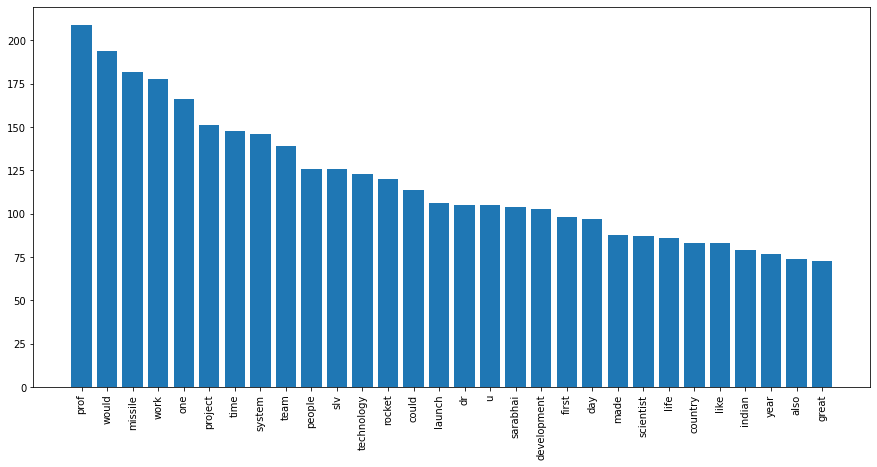

In [114]:
word = []
word_count= []
for i in range(len(freq_dist.most_common(30))):
    word.append(freq_dist.most_common(30)[i][0])
    word_count.append(freq_dist.most_common(30)[i][1])
    
plt.figure(figsize=(15,7))
y_pos = range(len(word))
plt.bar(y_pos, word_count)
# Rotation of the bars names
plt.xticks(y_pos, word, rotation=90, )
plt.show()

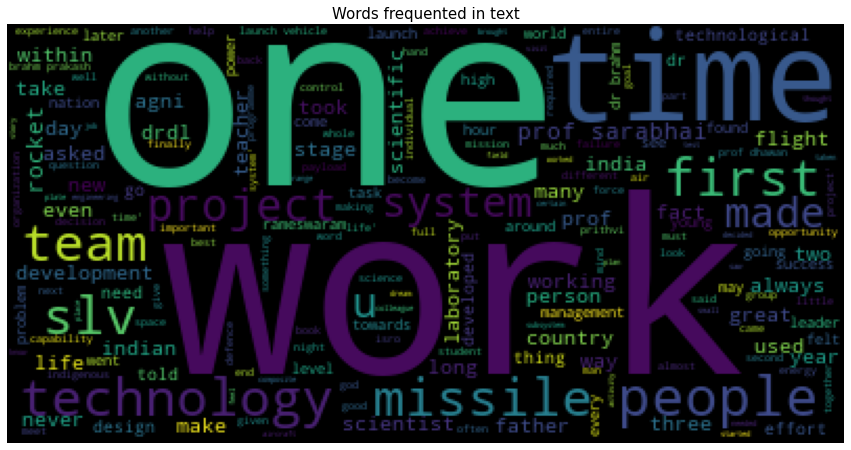

In [27]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                        background_color='black',
                        stopwords=stopwords,
                        max_words=200, 
                        random_state=42).generate(str(list1))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("Words frequented in text", fontsize=15)
plt.imshow(wordcloud.recolor(colormap= 'viridis' , random_state=42))
plt.show()

## Analysing the sentiment

In [31]:
df1=pd.DataFrame(list1)
df1.columns = ["text"]

In [32]:
df1.shape

(3132, 1)

In [33]:
df1['text'][0]

'wing fire abdul kalam wing fire autobiography avul pakir jainulabdeen abdul kalam come personally represent many countryman best aspect indian life'

In [34]:
scores=[]
compound_list=[]
positive_list=[]
negative_list=[]
neutral_list=[]

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

In [37]:
for i in range(0, len(df1)):
  compound=analyzer.polarity_scores(df1['text'][i])['compound']
  pos=analyzer.polarity_scores(df1['text'][i])['pos']
  neu=analyzer.polarity_scores(df1['text'][i])['neu']
  neg=analyzer.polarity_scores(df1['text'][i])['neg']
  scores.append({'Compound':compound,'positive':pos,'neutral':neu,'negative':neg})

In [40]:
sentiment_scores=pd.DataFrame.from_dict(scores)
print(sentiment_scores)

      Compound  positive  neutral  negative
0       0.1027     0.156    0.667     0.178
1       0.5994     0.234    0.766     0.000
2       0.8658     0.451    0.549     0.000
3      -0.4019     0.068    0.777     0.155
4       0.6486     0.281    0.633     0.086
...        ...       ...      ...       ...
3127    0.8074     0.624    0.376     0.000
3128   -0.0258     0.203    0.654     0.144
3129    0.6908     0.427    0.573     0.000
3130    0.2500     0.333    0.667     0.000
3131    0.0000     0.000    0.000     0.000

[3132 rows x 4 columns]


In [42]:
df1=df1.join(sentiment_scores)
df1

,text,Compound,positive,neutral,negative
0,wing fire abdul kalam wing fire autobiography ...,0.1027,0.156,0.667,0.178
1,born son little educated boatowner rameswaram ...,0.5994,0.234,0.766,0.000
2,chief country defence research development pro...,0.8658,0.451,0.549,0.000
3,story kalam rise obscurity personal profession...,-0.4019,0.068,0.777,0.155
4,time helped create india awesome weaponry kala...,0.6486,0.281,0.633,0.086
...,...,...,...,...,...
3127,nation need economic prosperity strong securit...,0.8074,0.624,0.376,0.000
3128,self reliance mission defence system provide a...,-0.0258,0.203,0.654,0.144
3129,technology vision plan put place certain schem...,0.6908,0.427,0.573,0.000
3130,two plan evolved nation dream,0.2500,0.333,0.667,0.000


In [43]:
df1.columns

Index(['text', 'Compound', 'positive', 'neutral', 'negative'], dtype='object')

In [73]:
df1['Sentiment']=df1['Compound'].apply(lambda c:'neu' if c==0 else 'pos' if c > 0 else 'neg')
df1

,text,Compound,positive,neutral,negative,Sentiment
0,wing fire abdul kalam wing fire autobiography ...,0.1027,0.156,0.667,0.178,pos
1,born son little educated boatowner rameswaram ...,0.5994,0.234,0.766,0.000,pos
2,chief country defence research development pro...,0.8658,0.451,0.549,0.000,pos
3,story kalam rise obscurity personal profession...,-0.4019,0.068,0.777,0.155,neg
4,time helped create india awesome weaponry kala...,0.6486,0.281,0.633,0.086,pos
...,...,...,...,...,...,...
3127,nation need economic prosperity strong securit...,0.8074,0.624,0.376,0.000,pos
3128,self reliance mission defence system provide a...,-0.0258,0.203,0.654,0.144,neg
3129,technology vision plan put place certain schem...,0.6908,0.427,0.573,0.000,pos
3130,two plan evolved nation dream,0.2500,0.333,0.667,0.000,pos


In [74]:
# df1['Sentiment']=df1['Compound'].apply(lambda c:'neg' if c < -0.05 else 'pos' if c > 0.05 else 'neu')
# df1

In [75]:
df1["Sentiment"].value_counts()

pos    1469
neu    1139
neg     524
Name: Sentiment, dtype: int64

In [76]:
value = [df1["Sentiment"].value_counts()[2],  
         df1["Sentiment"].value_counts()[1],  
         df1["Sentiment"].value_counts()[0]]

##### Sentiment chart

Text(0.5, 1.0, 'Sentiment Analysis')

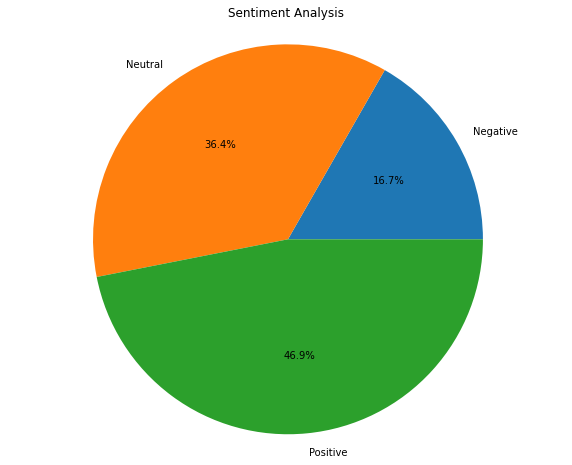

In [77]:
plt.figure(figsize=(10,8))
plt.pie(value, labels=['Negative','Neutral','Positive'], autopct='%1.1f%%',normalize=True)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Sentiment Analysis')

## Analysing book emotion

In [26]:
import text2emotion as te

[nltk_data] Downloading package stopwords to /home/a/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/a/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/a/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
score=te.get_emotion(str(list1))

##### Emotion chart

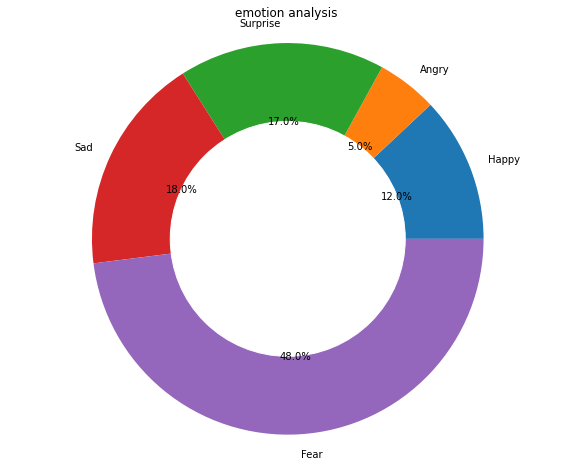

In [84]:
plt.figure(figsize=(10,8))
plt.pie(score.values(), labels=score.keys(), autopct='%1.1f%%',normalize=True)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('emotion analysis')
circle = plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [56]:
# emotion score
score

{'Happy': 0.12, 'Angry': 0.05, 'Surprise': 0.17, 'Sad': 0.18, 'Fear': 0.48}